In [1]:
'''
Подключение всех нужных библиотек и функций
'''


import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs

In [2]:
# Начальное условие для генератора случайных чисел
np.random.seed(42)


# LaTeX
def formatted(s):
    return '$%s$' % s


# Построение графика
def graph(X, y, clf, title=''):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='r')
    ax.set_title(title)
    plt.show()

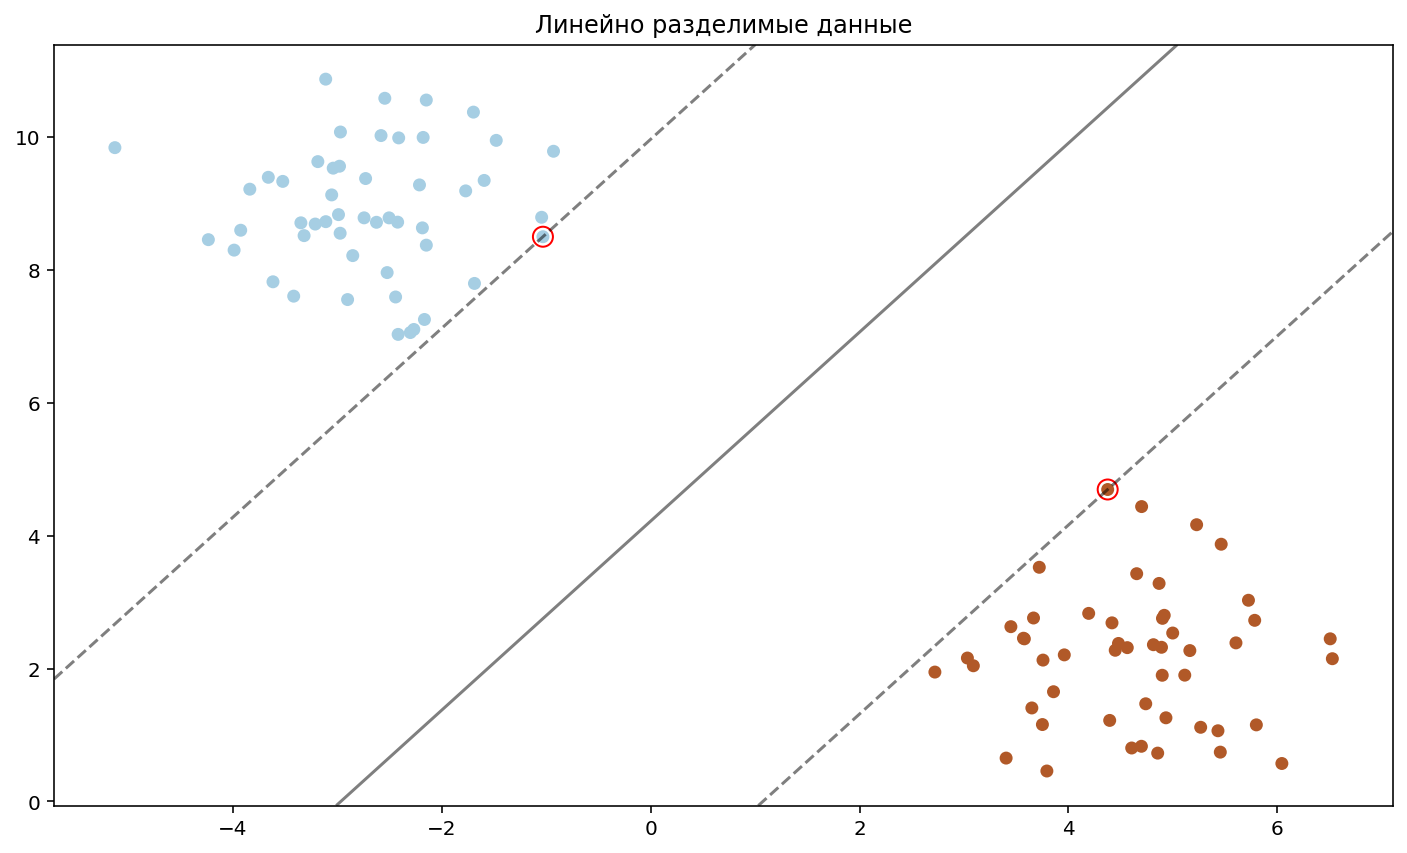

In [3]:
'''
Линейно разделимые данные
'''



# Генерация
n = 100
X, y = make_blobs(n_samples=n, centers=2, random_state=42)

# Обучение
clf = SVC(kernel='linear')
clf.fit(X, y)

graph(X, y, clf, 'Линейно разделимые данные')

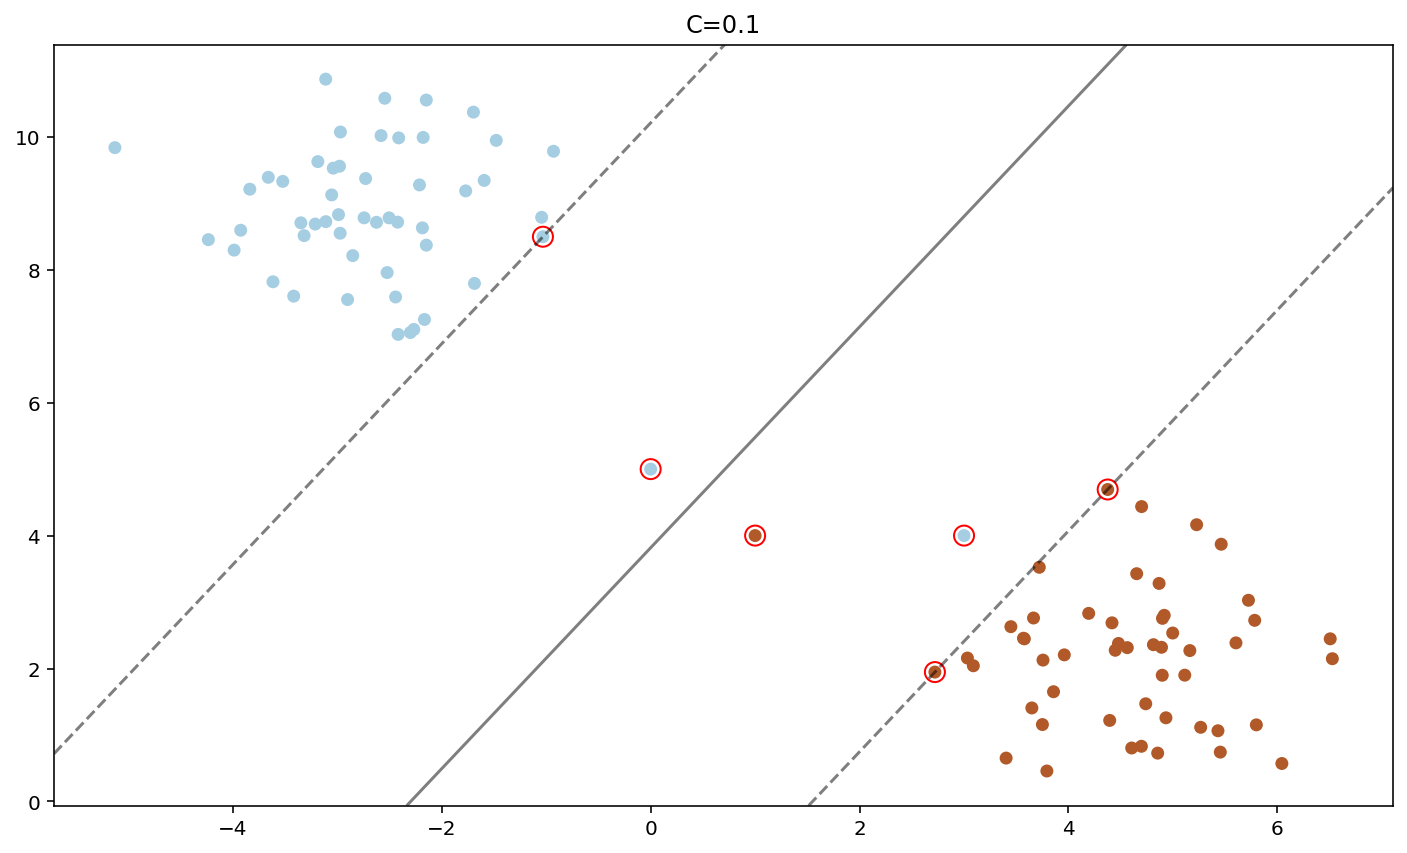

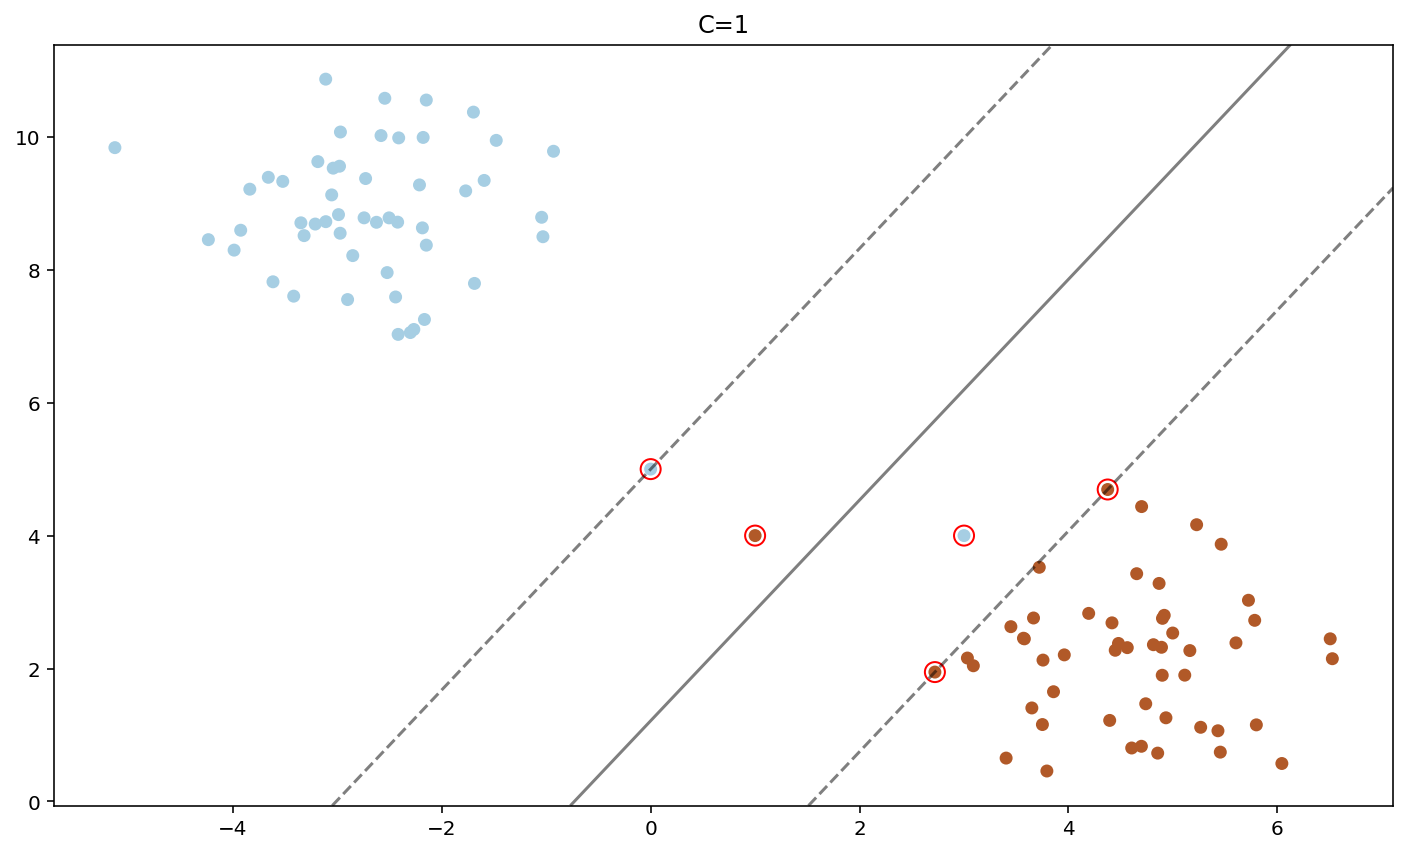

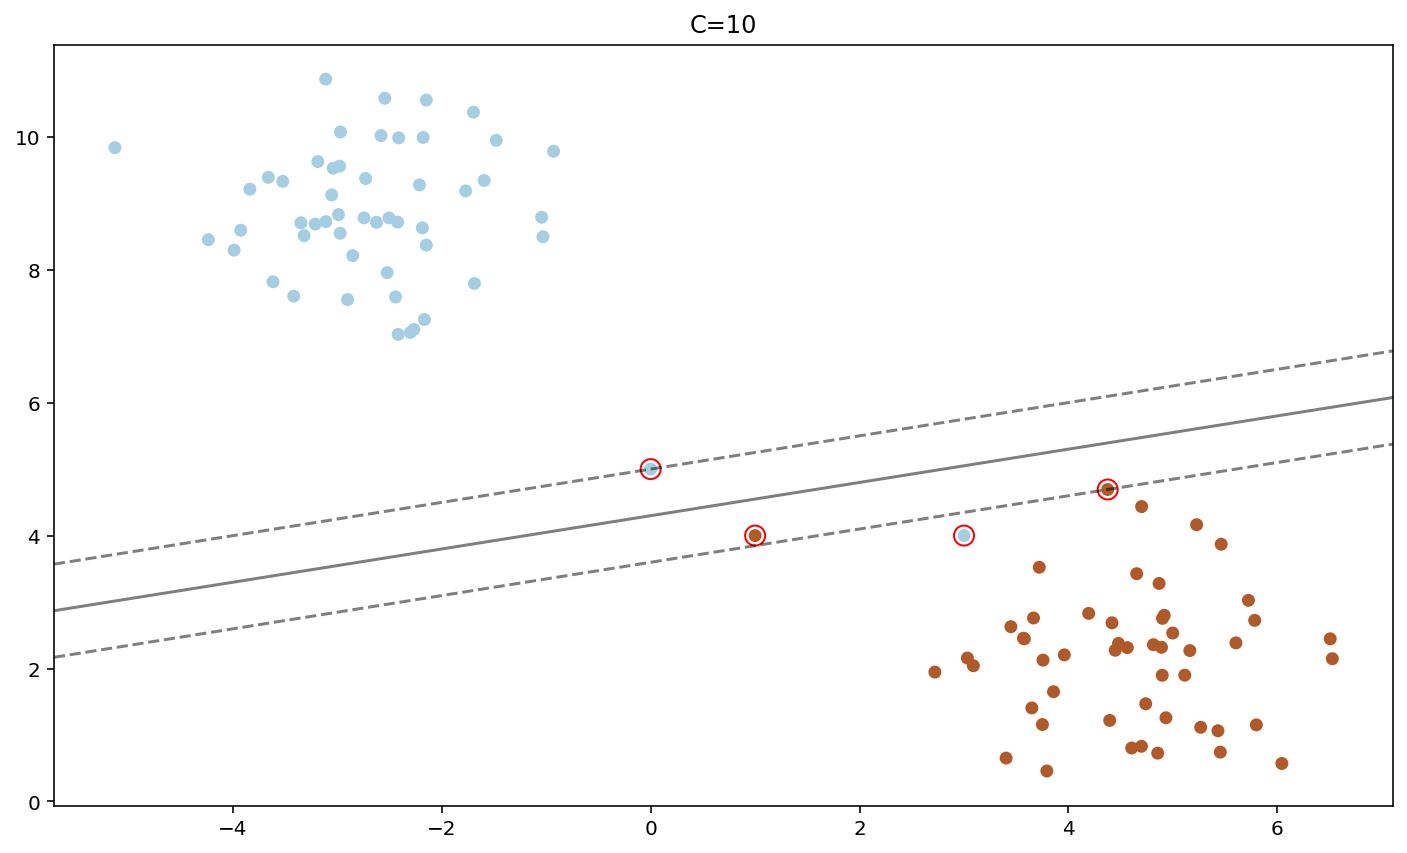

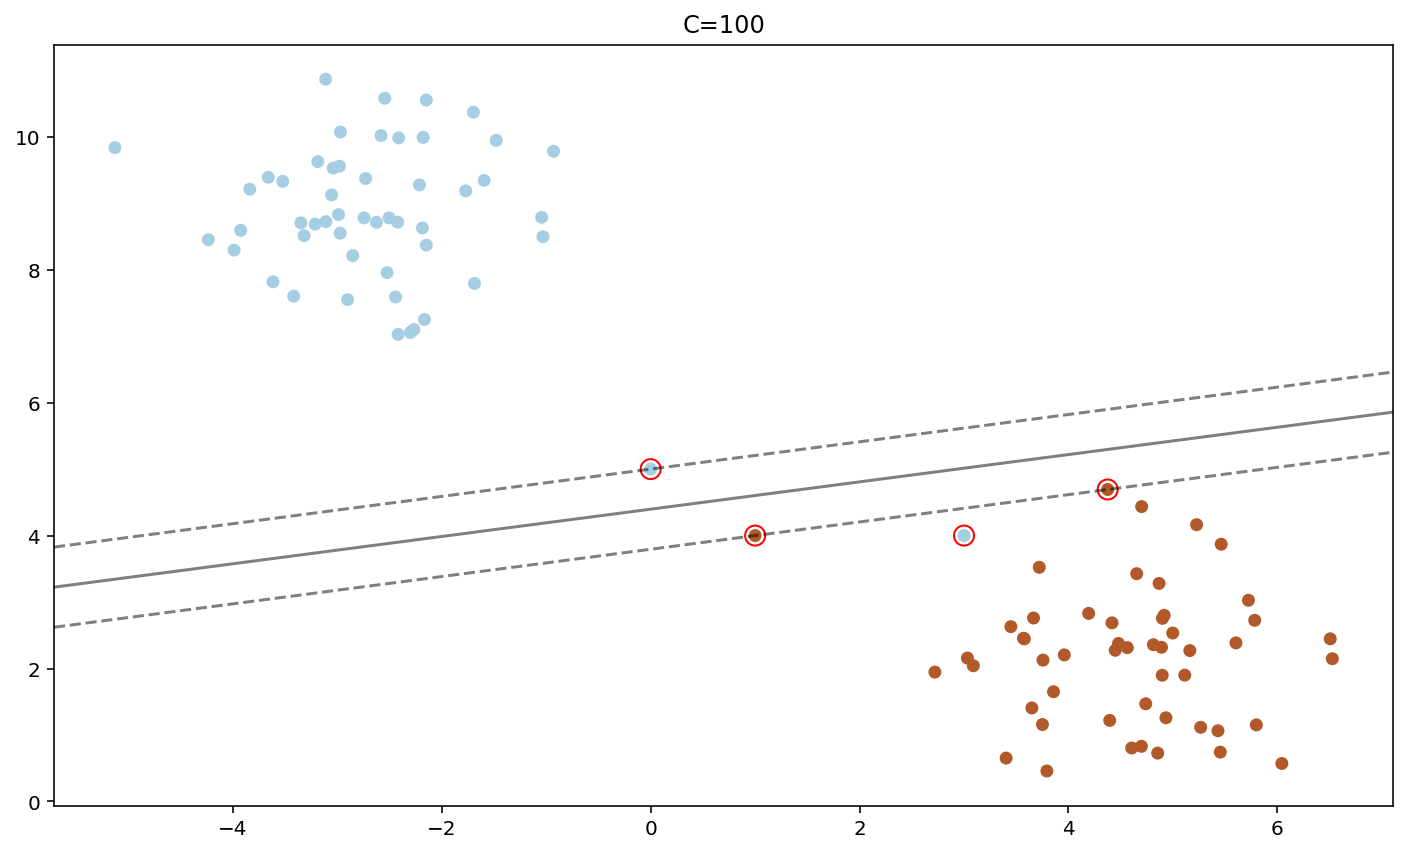

$C$,$M=\frac{1}{\left \| w \right \|}$
0.1,3.296144
1,1.952715
10,0.679880
100,0.590560


In [4]:
'''
Линейно разделимые данные с внесёнными выбросами
'''



# Генерация
n = 100
X, y = make_blobs(n_samples=n, centers=2, random_state=42)

# Внесение выбросов
outliers_X = np.array([
        [0, 5],
        [1, 4],
        [3, 4]
    ])
outliers_y = np.array([
        0,
        1,
        0
    ]).T
X = np.append(X, outliers_X, axis=0)
y = np.append(y, outliers_y, axis=0)

table = pd.DataFrame(data=[], columns=[formatted(r"M=\frac{1}{\left \| w \right \|}")])
table.columns.name = formatted(r'C')

# Исследование при различных C
for C in [0.1, 1, 10, 100]:
    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)
    norm_w = np.sqrt(np.sum(clf.coef_ ** 2))
    M = 1 / norm_w
    table.loc[str(C)] = [M]

    graph(X, y, clf, 'C=' + str(C))

display(table)

In [0]:
'''
Линейно неразделимые данные
'''



# Генерация
n = 100
X, y = make_circles(n_samples=n, factor=0.3, noise=0.05, random_state=42)

# fit the model
# gamma = 1 / (np.var(X, axis=1))
# clf = SVC(kernel='rbf', gamma=gamma)

clf.fit(X, Y)

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
            facecolors='none', zorder=10, edgecolors='k')
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
            edgecolors='k')

x_min = -3
x_max = 3
y_min = -3
y_max = 3

XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure(fignum, figsize=(4, 3))
plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-.5, 0, .5])
plt.show()

<ipython-input-5-dc36989af1fd>:3: RuntimeWarning: covariance is not positive-semidefinite.
  return np.random.multivariate_normal(mean=mean, cov=sigma, size=size)


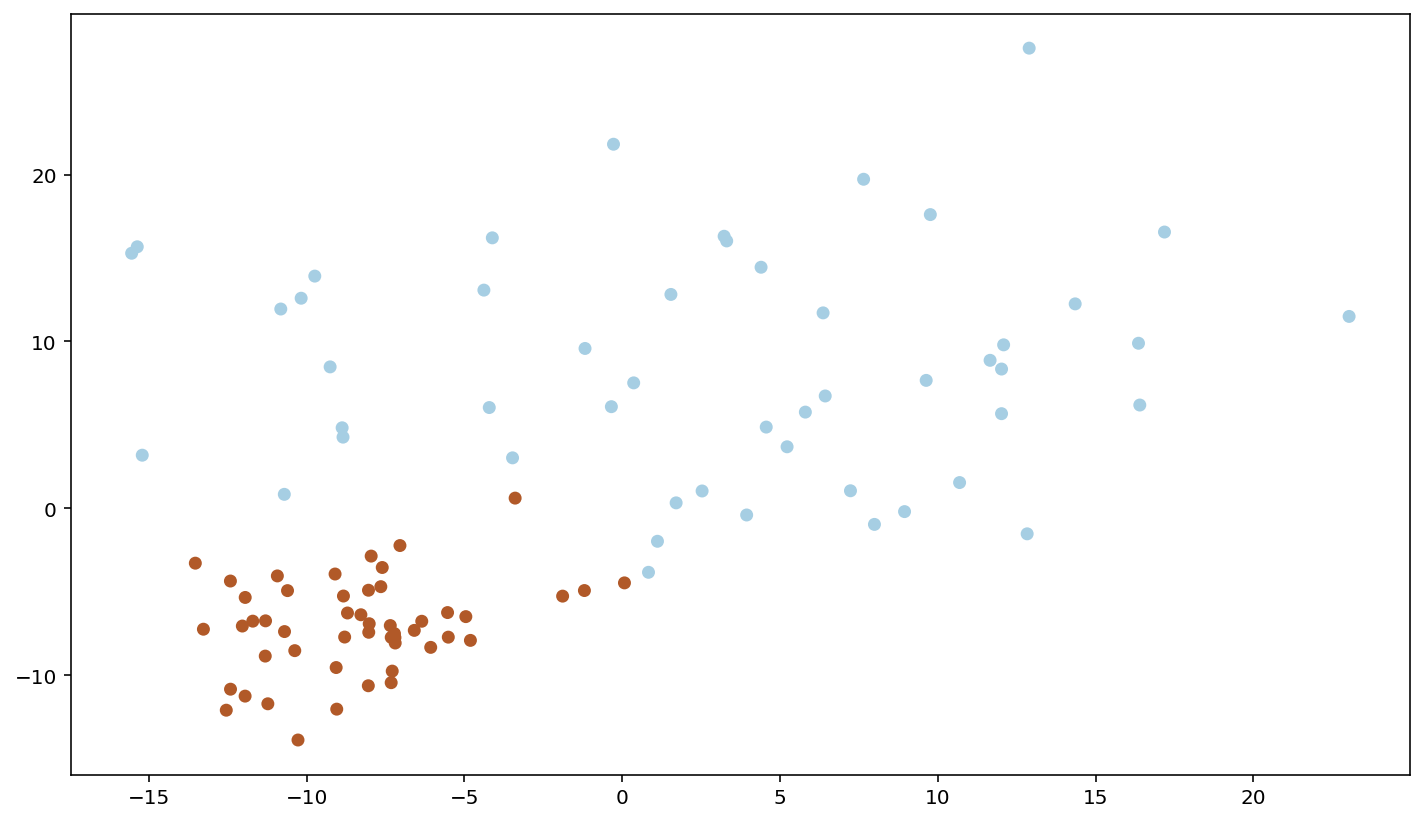

In [5]:
# Генерация случайной выборки из многомерного нормального распределения
def gen_N(mean, sigma, size):
    return np.random.multivariate_normal(mean=mean, cov=sigma, size=size)


n = 50
sigma_1 = np.array([
        [101, 0],
        [0, 60]
    ])
mu_1 = np.array([5, 7])
X_1 = gen_N(mu_1, sigma_1, n)
y_1 = np.full((n, 1), 1)

sigma_2 = np.array([
        [1, 8],
        [8, 1]
    ])
mu_2 = np.array([-8, -7])
X_2 = gen_N(mu_2, sigma_2, n)
y_2 = np.full((n, 1), 2)

X = np.append(X_1, X_2, axis=0)
y = np.append(y_1, y_2, axis=0)

ax = plt.gca()
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_title('кекс')
# ax.legend('лол')

# clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
# clf.fit(X, y)
# print(clf.predict([[-0.8, -1]]))